In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Electric_Vehicle_Population_Data copy.csv')

In [5]:
#Check the structure and contents of the dataset using 
print(df.head())
df.info()

   VIN (1-10)     County       City State  Postal Code  Model Year    Make  \
0  5YJ3E1EA0K   Thurston   Tumwater    WA      98512.0        2019   TESLA   
1  1N4BZ1DV4N     Island    Clinton    WA      98236.0        2022  NISSAN   
2  5YJ3E1EA0L  Snohomish  Snohomish    WA      98290.0        2020   TESLA   
3  5YJ3E1EBXL       King    Seattle    WA      98134.0        2020   TESLA   
4  5YJSA1CP0D  Snohomish    Edmonds    WA      98020.0        2013   TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1     LEAF  Battery Electric Vehicle (BEV)   
2  MODEL 3  Battery Electric Vehicle (BEV)   
3  MODEL 3  Battery Electric Vehicle (BEV)   
4  MODEL S  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible           220.0   
1  Eligibility unknown as battery range has not b...             0.0   
2            Clean Alternative Fuel Ve

In [6]:
#Examine summary statistics using
df.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,135030.000000,135038.000000,135037.000000,135037.000000,134726.000000,1.350380e+05,1.350300e+05
mean,98171.001577,2019.662880,74.591964,1448.407325,29.504379,2.063432e+08,5.297233e+10
std,2450.367211,3.001676,98.744120,9683.658138,14.783780,8.582417e+07,1.635783e+09
min,1730.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.081042e+09
25%,98052.000000,2018.000000,0.000000,0.000000,18.000000,1.606305e+08,5.303301e+10
50%,98121.000000,2021.000000,21.000000,0.000000,34.000000,2.059563e+08,5.303303e+10
75%,98370.000000,2022.000000,150.000000,0.000000,43.000000,2.308888e+08,5.305307e+10
max,99701.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [7]:
#Check for missing values with
df.isnull().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

# Data Cleaning

In [8]:
#Handling Missing Values

In [9]:
#Identify columns with missing values using 
df.isnull().sum()

VIN (1-10)                                             0
County                                                 8
City                                                   8
State                                                  0
Postal Code                                            8
Model Year                                             0
Make                                                   0
Model                                                249
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         1
Base MSRP                                              1
Legislative District                                 312
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       8
2020 Census Tract                                      8
dtype: int64

In [10]:
#to drop any column with many missing values
df = df.drop('Legislative District', axis=1)

In [11]:
#to check the axes
df.axes

[RangeIndex(start=0, stop=135038, step=1),
 Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
        'Make', 'Model', 'Electric Vehicle Type',
        'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
        'Base MSRP', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility',
        '2020 Census Tract'],
       dtype='object')]

In [12]:
numeric_rows = df['Model'].str.isnumeric()
numeric_rows

0         False
1         False
2         False
3         False
4         False
          ...  
135033    False
135034    False
135035    False
135036    False
135037    False
Name: Model, Length: 135038, dtype: object

# What are the most common electric vehicle models in the dataset?

In [13]:
vehicle_counts = df['Model'].value_counts()
print(vehicle_counts.head(5))

MODEL 3    25837
MODEL Y    23577
LEAF       13020
MODEL S     7473
BOLT EV     5419
Name: Model, dtype: int64


# How does the electric range vary across different vehicle Make?

In [14]:
plt.figure(figsize=(500, 6))

<Figure size 50000x600 with 0 Axes>

<Figure size 50000x600 with 0 Axes>

In [15]:
#If model vs range is scattered
#df['Model'] = df['Model'].astype(str)

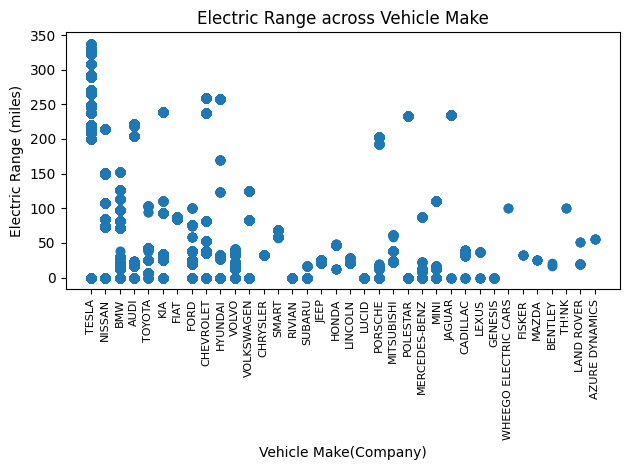

In [16]:
plt.scatter(df['Make'], df['Electric Range'])
plt.xlabel('Vehicle Make(Company)')
plt.ylabel('Electric Range (miles)')
plt.title('Electric Range across Vehicle Make')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()

In [17]:

# 
# 
# Are there any differences in electric vehicle adoption between urban and rural areas (counties or cities)?
# Which electric utilities are most commonly associated with electric vehicle locations?
# What is the average base MSRP of electric vehicles by make or model year?
# Can you identify any legislative districts with a high concentration of electric vehicles?
# Are electric vehicles eligible for Clean Alternative Fuel Vehicle (CAFV) programs in certain states or regions?

# Which states have the highest number of electric vehicles?

In [19]:
state_counts = df['State'].value_counts()
state_counts

WA    134726
CA        90
VA        33
MD        29
TX        18
NC        11
CO        11
AZ         9
IL         7
CT         7
NY         6
HI         6
NV         6
GA         6
SC         6
OR         6
NJ         6
DC         5
KS         4
LA         4
MA         3
AR         3
FL         3
MO         3
NE         3
ID         2
BC         2
UT         2
OH         2
WY         2
TN         2
NH         1
MT         1
AK         1
RI         1
IN         1
MI         1
PA         1
MS         1
AL         1
KY         1
OK         1
NM         1
DE         1
AP         1
MN         1
Name: State, dtype: int64

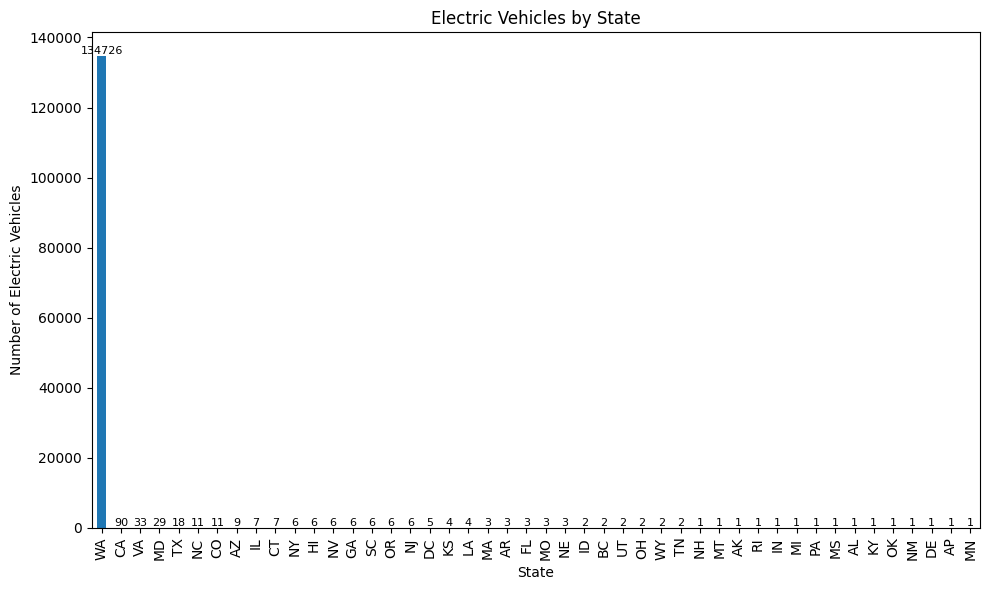

In [41]:
#We can use a bar-plot to plot this analysis
#edits to make it more readble
plt.figure(figsize=(10, 6))
plt.xlabel('State')
plt.ylabel('Number of Electric Vehicles')
plt.title('Electric Vehicles by State')
plt.xticks(rotation=90)
state_counts.plot(kind='bar')

# Display the actual numbers on top of the bars
for i, v in enumerate(state_counts):
    plt.text(i, v, str(v), ha='center', va='bottom', fontsize=8)
    
plt.tight_layout() #for a compact layout without unnecessary texts

# Are there any correlations between the electric range and the base MSRP (price) of electric vehicles?


In [47]:
#Skipping this Question as there isn't enough base MSRP info

# What is the distribution of electric vehicle types in the dataset (e.g., plug-in hybrid, battery electric)?

In [51]:
electric_vehicle_types = df['Electric Vehicle Type']
electric_vehicle_types

0                 Battery Electric Vehicle (BEV)
1                 Battery Electric Vehicle (BEV)
2                 Battery Electric Vehicle (BEV)
3                 Battery Electric Vehicle (BEV)
4                 Battery Electric Vehicle (BEV)
                           ...                  
135033            Battery Electric Vehicle (BEV)
135034            Battery Electric Vehicle (BEV)
135035            Battery Electric Vehicle (BEV)
135036            Battery Electric Vehicle (BEV)
135037    Plug-in Hybrid Electric Vehicle (PHEV)
Name: Electric Vehicle Type, Length: 135038, dtype: object

In [53]:
electric_vehicle_type_counts = electric_vehicle_types.value_counts()
electric_vehicle_type_counts

Battery Electric Vehicle (BEV)            103882
Plug-in Hybrid Electric Vehicle (PHEV)     31156
Name: Electric Vehicle Type, dtype: int64

(-1.0999999137241834,
 1.0999999958916278,
 -1.0999999121536042,
 1.099999970410861)

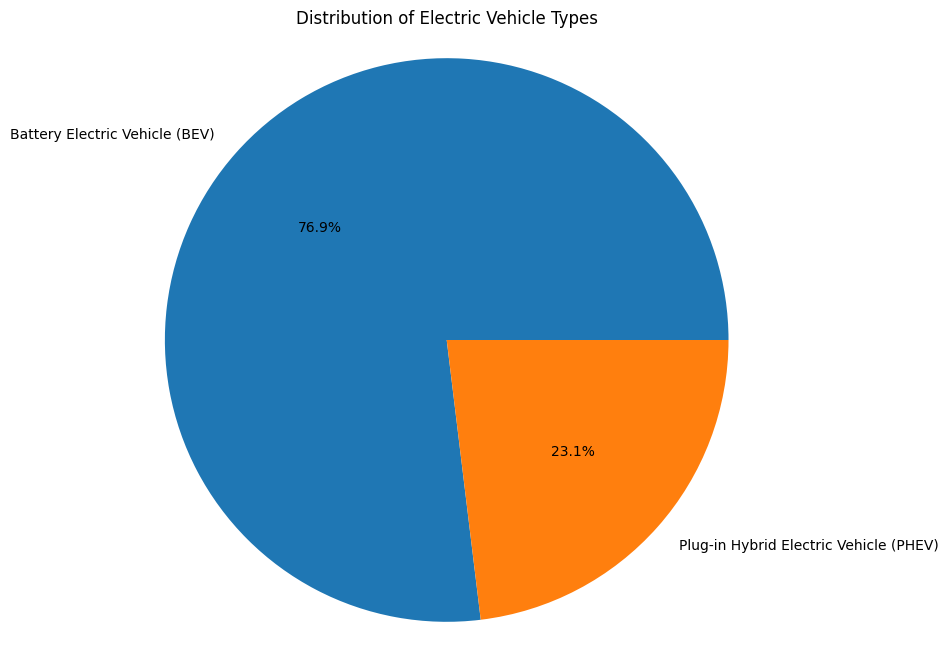

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

electric_vehicle_type_counts = df['Electric Vehicle Type'].value_counts()

# Plotting a pie chart
explode = (0, 0.1)
plt.pie(electric_vehicle_type_counts, labels=electric_vehicle_type_counts.index, autopct='%1.1f%%')

plt.title('Distribution of Electric Vehicle Types')

plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart